In [1]:
import scipy.io
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import feature_selection

mat1 = scipy.io.loadmat('DataV1.mat')

In [2]:
Features = mat1["Feat"]
Labels = mat1["Label"]
print(np.shape(Features), np.shape(Labels))

(328, 779) (328, 1)


In [3]:
# Seperate Test and Train!
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.25)
print(np.shape(X_train), np.shape(X_test))

(246, 779) (82, 779)


In [4]:
## Calculate P-Values and Remove NaNs

Jvals = feature_selection.f_classif(X_train, np.ravel(y_train))
pvals = Jvals[1]

pvals[np.isnan(pvals)] = 0
np.sum(np.isnan(pvals))


/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [388 434 480 526 572 618 664 710 756] are constant.
  UserWarning)
/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0

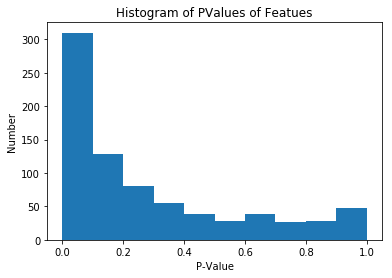

In [5]:
plt.figure()
plt.hist(pvals)
plt.title("Histogram of PValues of Featues")
plt.xlabel("P-Value")
plt.ylabel("Number")
plt.show()

In [6]:
np.argsort(pvals)

array([572, 618, 526, 710, 480, 756, 434, 664, 388, 161, 369, 489, 775,
       683, 499, 443, 351, 638, 760, 776, 116, 407, 523, 525, 535, 512,
       522, 661, 321, 170, 125, 637, 761, 397, 501, 120, 564, 500, 684,
       673, 734, 408, 631, 107, 293, 757,  64, 292, 763, 686,  65, 765,
       778, 301,  26, 163, 328,  71, 305, 669, 164, 346, 627, 431, 272,
       118, 119, 302, 410, 702, 111, 283, 640, 127, 454, 518, 128,  55,
       771, 502, 546, 538, 663, 493, 766, 338, 748, 592, 296, 247,  56,
       332,  35, 287,  44, 759, 531, 335, 180,  57, 455, 719, 409, 558,
       265, 453, 290, 573, 621, 266, 655,   9, 299, 753, 317, 286, 581,
       374, 650, 685, 361, 184, 456, 307, 671, 752, 323,  27, 271, 519,
       275,  62, 233,  63, 314, 202, 364, 282, 260, 216, 764, 533, 227,
       179, 143, 201, 614, 276, 212, 591, 343,  19, 569, 264, 598, 565,
       545, 668, 433, 218, 196, 250,  36, 109, 674, 178, 102, 244,  20,
       237, 262, 303, 577, 246, 110, 326, 300, 254, 241, 315, 53

In [7]:
# Linear SVM with no dimension reduction!
print('Starting Linear SVM!...')
clf = svm.SVC(kernel='linear')

clf.fit(X_train, np.ravel(y_train)) 
print('Done!')
print('Prediction on Test Set!...')
score = cross_val_score(clf,X_train,np.ravel(y_train),cv=5)
print('Accuracy:', np.mean(score))
print('STD:', np.std(score))
print(score)
print('Done!')


Starting Linear SVM!...
Done!
Prediction on Test Set!...
Accuracy: 0.8208979591836734
STD: 0.03591317216603224
[0.88       0.79591837 0.83673469 0.81632653 0.7755102 ]
Done!


In [22]:
# Linear SVM with dimension reduction!
acc = np.zeros(11)
for i in range(10):
    # Seperate Test and Train!
    X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.25)
    #print(np.shape(X_train), np.shape(X_test))

    ## Calculate P-Values and Remove NaNs

    Jvals = feature_selection.f_classif(X_train, np.ravel(y_train))
    pvals = Jvals[1]

    pvals[np.isnan(pvals)] = 0
    np.sum(np.isnan(pvals))

    th = 0.1
    #print('Starting Linear SVM!...')
    clf = svm.SVC( kernel='linear')
    clf.fit(X_train[:, pvals < th], np.ravel(y_train)) 
    y_pred = clf.predict(X_test[:, pvals < th])
    acc[i] = accuracy_score(y_test, y_pred)

    
print(np.mean(acc))
print('Done!')


/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [388 434 480 526 572 618 664 710 756] are constant.
  UserWarning)
/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [388 434 480 526 572 618 664 710 756] are constant.
  UserWarning)
/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [365 388 411 434 457 480 503 526 549 572 595 618 641 664 687 710 733 756] 

0.7926829268292684
Done!


/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [388 434 480 526 572 618 664 710 756] are constant.
  UserWarning)
/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [388 434 480 526 572 618 664 710 756] are constant.
  UserWarning)
/home/bemoniri/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
